### Fundamental of Machine Learning

In [64]:
# import
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers
from keras.datasets import imdb

In [3]:
from myutils import *

In [4]:
# reading the data
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [7]:
print(train_data[:2])

[ list([1, 17, 173, 7, 4, 5298, 7, 4, 766, 7, 6130, 2, 14, 22, 19, 4, 162, 1648, 1184, 11, 12, 16, 617, 39, 167, 2477, 2, 2, 2190, 13, 220, 679, 12, 125, 18, 112, 6, 227, 357, 21, 146, 1264, 13, 1571, 19, 12, 691, 203, 2160, 5282, 9, 6, 686, 452, 7, 3177, 2247, 2613, 1532, 37, 983, 1085, 259, 5, 47, 24, 69, 6, 1432, 11, 153, 41, 577, 560, 15, 59, 238, 181, 8, 79, 1021, 8, 41, 162, 1432, 5172, 2274, 3789, 7, 265, 103, 1275, 257, 85, 64, 6, 171, 504, 203, 5, 5172, 28, 6, 1003, 1586, 5, 33, 41, 559, 19, 6, 1088, 142, 5, 4, 162, 1648, 553, 36, 540, 181, 8, 401, 12, 6, 1003, 21, 203, 47, 9428, 5, 3575, 48, 3177, 80, 169, 46, 54, 59, 127, 5172, 214, 329, 2, 74, 203, 11, 192, 3177, 1643, 41, 2, 8, 569, 41, 82, 1184, 826, 2, 17, 2, 2, 2, 17, 2, 2162, 1335, 2, 17, 1335, 2, 2, 17, 2, 5, 1806, 2, 2402, 2108, 3770, 17, 1478, 55, 52])
 list([1, 14, 20, 9, 6, 6044, 8, 4, 678, 2756, 3135, 13, 412, 11, 2, 5, 60, 13, 191, 264, 36, 7013, 9925, 422, 13, 923, 33, 4, 58, 4, 147, 3699, 71, 184, 52, 5, 4, 52

In [9]:
# getting max value of index used in data
max([max(row) for row in train_data])

9999

In [18]:
def vectorization(df, dim):
    """
    df - Input dataframe
    dim - dimension
    """
    tmp = np.zeros((len(df), dim))
    for idx, val in enumerate(df):
        tmp[idx, val] = 1
    return tmp

In [29]:
vec_train_data = vectorization(train_data, 10000)
vec_test_data = vectorization(test_data, 10000)

In [31]:
train_labels = np.asarray(train_label).astype("float32")
test_labels = np.asarray(test_label).astype("float32")

## Controlling Overfitting  
### #1. Creating a model with less layers and parameters

In [36]:
X_val = vec_train_data[:10000]
X_train = vec_train_data[10000:]
y_val = train_labels[:10000]
y_train = train_labels[10000:]

In [37]:
model_16 = models.Sequential()
model_16.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model_16.add(layers.Dense(16, activation="relu"))
model_16.add(layers.Dense(1, activation="sigmoid"))
             
model_16.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist = model_16.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

history = hist.history
print(history.keys())

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.5222 - acc: 0.7766 - val_loss: 0.3811 - val_acc: 0.8712
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.3060 - acc: 0.9034 - val_loss: 0.3087 - val_acc: 0.8869
Epoch 3/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2235 - acc: 0.9275 - val_loss: 0.2804 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1725 - acc: 0.9456 - val_loss: 0.2935 - val_acc: 0.8830
Epoch 5/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1408 - acc: 0.9566 - val_loss: 0.3193 - val_acc: 0.8766
Epoch 6/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1167 - acc: 0.9654 - val_loss: 0.3064 - val_acc: 0.8838
Epoch 7/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.0970 - acc: 0.9726 - val_loss: 0.3297 - 

In [42]:
history['val_loss']

[0.38105251841545107,
 0.30874272799491881,
 0.28036606090068816,
 0.29353004250526427,
 0.3193009799003601,
 0.30635241837501526,
 0.32970202364921569,
 0.34853286190032962,
 0.38563014550209046,
 0.46725340089797973,
 0.43704479799270629,
 0.46920207180976869,
 0.50670082454681398,
 0.54360932016372676,
 0.57436898827552796,
 0.61077060976028441,
 0.64676725139617919,
 0.72559997997283932,
 0.71675815134048459,
 0.76011974916458125]

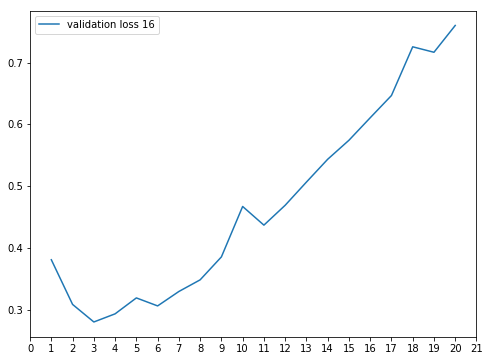

In [68]:
fig = plt.figure(figsize=(8, 6))
plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
#plt.plot(range(1,len(history['val_loss'])+1), history['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()

#### Another model with 3 layers and 4 units

In [59]:
model_4 = models.Sequential()
model_4.add(layers.Dense(4, activation="relu", input_shape=(10000,)))
model_4.add(layers.Dense(4, activation="relu"))
model_4.add(layers.Dense(1, activation="sigmoid"))
             
model_4.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist_4 = model_4.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.6661 - acc: 0.6173 - val_loss: 0.6415 - val_acc: 0.5937
Epoch 2/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.6118 - acc: 0.7125 - val_loss: 0.5955 - val_acc: 0.7234
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.5646 - acc: 0.7733 - val_loss: 0.5599 - val_acc: 0.7477
Epoch 4/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.5242 - acc: 0.8167 - val_loss: 0.5292 - val_acc: 0.7918
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.4897 - acc: 0.8489 - val_loss: 0.5037 - val_acc: 0.8312
Epoch 6/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.4608 - acc: 0.8745 - val_loss: 0.4882 - val_acc: 0.8253
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.4354 - acc: 0.8911 - val_loss: 0.4684 - 

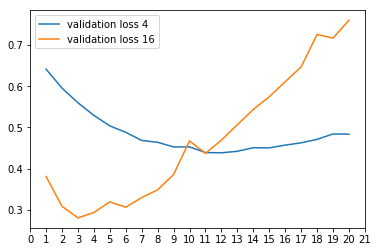

In [70]:
history_4 = hist_4.history

plt.plot(range(1,len(history_4['val_loss'])+1), history_4['val_loss'], label="validation loss 4")
plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
#plt.plot(range(1,len(history_4['val_loss'])+1), history_4['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()

#### Another Bigger Model

In [62]:
model_256 = models.Sequential()
model_256.add(layers.Dense(256, activation="relu", input_shape=(10000,)))
model_256.add(layers.Dense(256, activation="relu"))
model_256.add(layers.Dense(1, activation="sigmoid"))
             
model_256.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist_256 = model_256.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 338us/step - loss: 0.4982 - acc: 0.7741 - val_loss: 0.2906 - val_acc: 0.8876
Epoch 2/20
15000/15000 [==============================] - 5s 313us/step - loss: 0.2579 - acc: 0.8975 - val_loss: 0.3950 - val_acc: 0.8403
Epoch 3/20
15000/15000 [==============================] - 5s 316us/step - loss: 0.1712 - acc: 0.9350 - val_loss: 0.2852 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.0972 - acc: 0.9665 - val_loss: 0.3793 - val_acc: 0.8780
Epoch 5/20
15000/15000 [==============================] - 5s 316us/step - loss: 0.0786 - acc: 0.9771 - val_loss: 0.3696 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 5s 320us/step - loss: 0.0095 - acc: 0.9984 - val_loss: 0.4631 - val_acc: 0.8819
Epoch 7/20
15000/15000 [==============================] - 5s 318us/step - loss: 0.1324 - acc: 0.9777 - val_loss: 0.4652 - 

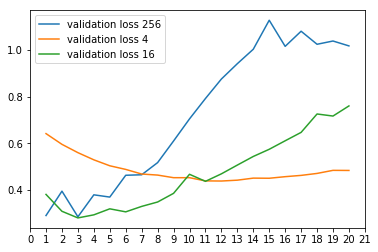

In [71]:
history_256 = hist_256.history

plt.plot(range(1,len(history['val_loss'])+1), history_256['val_loss'], label="validation loss 256")
plt.plot(range(1,len(history['val_loss'])+1), history_4['val_loss'], label="validation loss 4")
plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
#plt.plot(range(1,len(history_4['val_loss'])+1), history_4['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()

### #2. Weight Regularization

In [73]:
model_256_l2 = models.Sequential()
model_256_l2.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)))
model_256_l2.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model_256_l2.add(layers.Dense(1, activation="sigmoid"))
             
model_256_l2.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist_256_l2 = model_256_l2.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 358us/step - loss: 0.9002 - acc: 0.7872 - val_loss: 0.6078 - val_acc: 0.8601
Epoch 2/20
15000/15000 [==============================] - 5s 323us/step - loss: 0.5281 - acc: 0.8758 - val_loss: 0.4833 - val_acc: 0.8864
Epoch 3/20
15000/15000 [==============================] - 5s 332us/step - loss: 0.4143 - acc: 0.9043 - val_loss: 0.5793 - val_acc: 0.8251
Epoch 4/20
15000/15000 [==============================] - 5s 313us/step - loss: 0.3693 - acc: 0.9153 - val_loss: 0.4399 - val_acc: 0.8802
Epoch 5/20
15000/15000 [==============================] - 5s 309us/step - loss: 0.3306 - acc: 0.9233 - val_loss: 0.4205 - val_acc: 0.8823
Epoch 6/20
15000/15000 [==============================] - 5s 304us/step - loss: 0.2981 - acc: 0.9360 - val_loss: 0.4803 - val_acc: 0.8610
Epoch 7/20
15000/15000 [==============================] - 5s 307us/step - loss: 0.2828 - acc: 0.9346 - val_loss: 0.4283 - 

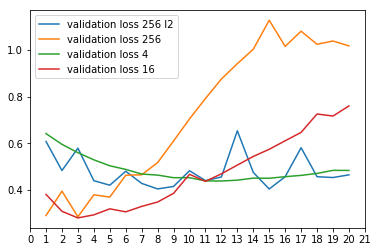

In [74]:
history_256_l2 = hist_256_l2.history

plt.plot(range(1,len(history['val_loss'])+1), history_256_l2['val_loss'], label="validation loss 256 l2")
plt.plot(range(1,len(history['val_loss'])+1), history_256['val_loss'], label="validation loss 256")
plt.plot(range(1,len(history['val_loss'])+1), history_4['val_loss'], label="validation loss 4")
plt.plot(range(1,len(history['val_loss'])+1), history['val_loss'], label="validation loss 16")
#plt.plot(range(1,len(history_4['val_loss'])+1), history_4['loss'], label="train loss")
plt.xticks(np.arange(22))
plt.legend()

plt.show()

###  #3. DropOut

In [75]:
model_256_do = models.Sequential()
model_256_do.add(layers.Dense(256, activation="relu", input_shape=(10000,)))
model_256_do.add(layers.Dropout(0.5))
model_256_do.add(layers.Dense(256, activation="relu"))
model_256_do.add(layers.Dropout(0.5))
model_256_do.add(layers.Dense(1, activation="sigmoid"))
             
model_256_do.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
             
hist_256_do = model_256_do.fit(X_train, y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

AttributeError: module 'theano' has no attribute 'ifelse'